In [91]:
%matplotlib inline

import pandas
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
import numpy as np
import matplotlib.pyplot as plt
col_namesY = ["Class"]
col_namesX= ["Alcohol","Malic acid","Ash","Alcalinity of ash",
            "Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols",
            "Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
data = pandas.read_csv('wine.data',names=col_namesY + col_namesX)

Найдите точность классификации на кросс-валидации для метода k ближайших соседей (sklearn.neighbors.KNeighborsClassifier), при k от 1 до 50. При каком k получилось оптимальное качество? Чему оно равно (число в интервале от 0 до 1)? Данные результаты и будут ответами на вопросы 1 и 2.

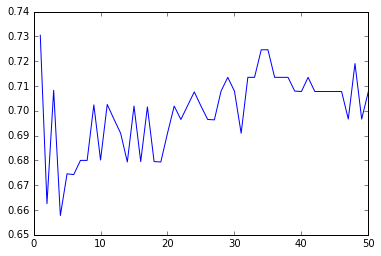

array([ 1.        ,  0.73047619])

In [101]:
X = np.array(data[col_namesX])
y = np.array(data[col_namesY]).ravel()
kf = KFold(data.shape[0], n_folds=5, random_state=42, shuffle=True)
results = []
for k in range(1, 51):
    neigh = KNeighborsClassifier(n_neighbors=k)
    score = np.average(sklearn.cross_validation.cross_val_score(neigh, X, y, scoring="accuracy", cv=kf))
    results.append([k, score])
    
results = np.array(results)
plt.plot(results[:,0], results[:,1])
plt.show()
results[0]

Произведите масштабирование признаков с помощью функции sklearn.preprocessing.scale. Снова найдите оптимальное k на кросс-валидации.

Какое значение k получилось оптимальным после приведения признаков к одному масштабу? Приведите ответы на вопросы 3 и 4. Помогло ли масштабирование признаков?

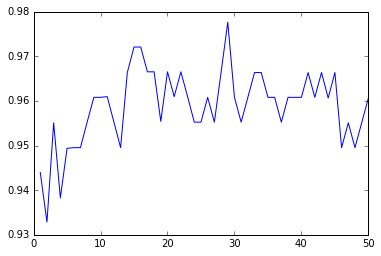

array([ 29.        ,   0.97761905])

In [102]:
X = sklearn.preprocessing.scale(np.array(data[col_namesX]))
y = np.array(data[col_namesY]).ravel()
kf = KFold(data.shape[0], n_folds=5, random_state=42, shuffle=True)
results = []
for k in range(1, 51):
    neigh = KNeighborsClassifier(n_neighbors=k)
    score = np.average(sklearn.cross_validation.cross_val_score(neigh, X, y, scoring="accuracy", cv=kf))
    results.append([k, score])
    
results = np.array(results)
plt.plot(results[:,0], results[:,1])
plt.show()
results[28]